In [1]:
import numpy as np

In [2]:
# Create data sets for comaprison
from ipynb.fs.defs.datasets import default_sets, N_DIM
datasets = default_sets()

In [3]:
# Get distance function and expected distribution
from ipynb.fs.defs.covfit import scaled
from scipy.stats import chi2
expected = chi2(df=1)
dist = lambda x: scaled(x, N_dim=N_DIM)

In [4]:
# Compute distances
distances = {}
for name, data in datasets.items():
    distances[name] = dist(data)

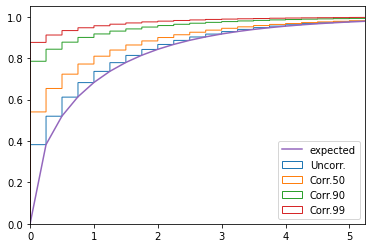

In [5]:
# Compare cumulative distributions
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(0, 2000, 8001)
for name in datasets:
    ax.hist(distances[name], bins=x, histtype="step",
        density=True, cumulative=True, linestyle='solid',
        label=name)
ax.plot(x, expected.cdf(x), label=f"expected")
ax.set_xlim(0, expected.mean() + expected.std()*3)
ax.legend(loc="lower right")

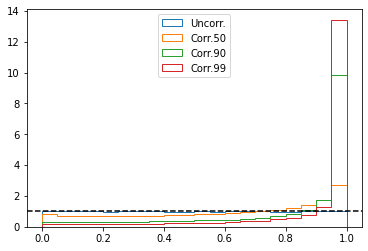

In [6]:
# Spread of p-values
fig, ax = plt.subplots()
x = np.linspace(0, 1, 21)
for name, data in distances.items():
    ax.hist(expected.sf(data), bins=x, histtype="step",
        density=True, cumulative=False, linestyle='solid',
        label=name)
ax.axhline(1., color="k", linestyle="dashed")
#ax.set_yscale("log")
ax.legend(loc="upper center")